In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [14]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
x = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): 0.05450927083721976
Intercept (c): 4.714126402214134


In [20]:
y_pred = model.predict(x_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [21]:
new_data = np.array([[150, 20, 30]])  
predicted_sales = model.predict(new_data)
 
print("Predicted sales:", predicted_sales[0])

Predicted sales: 15.039523680317233


In [22]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.907756910271092


In [23]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9059011844150826


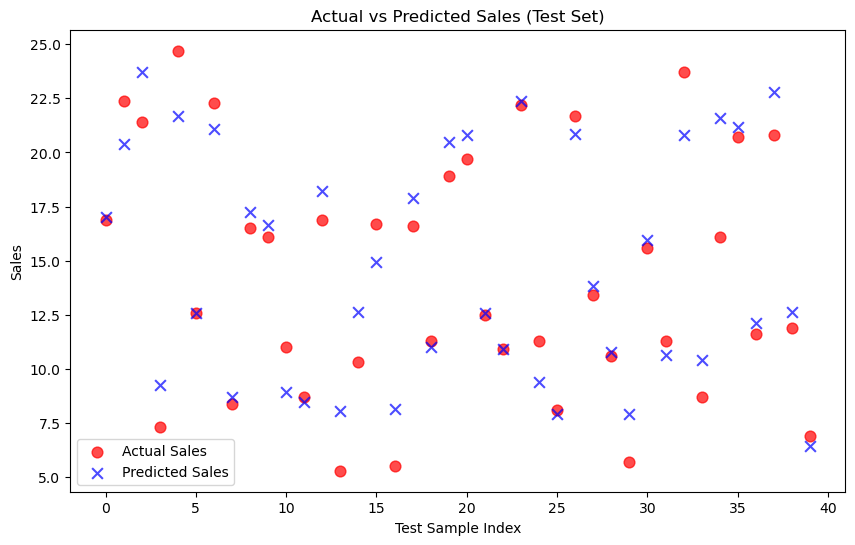

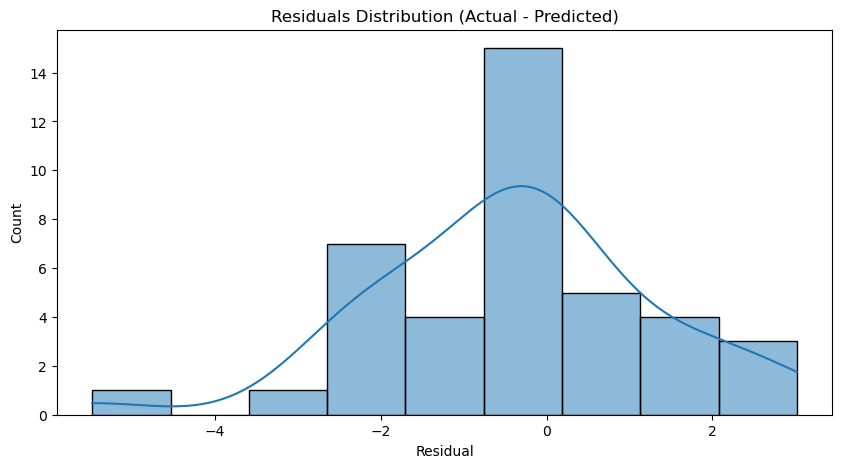

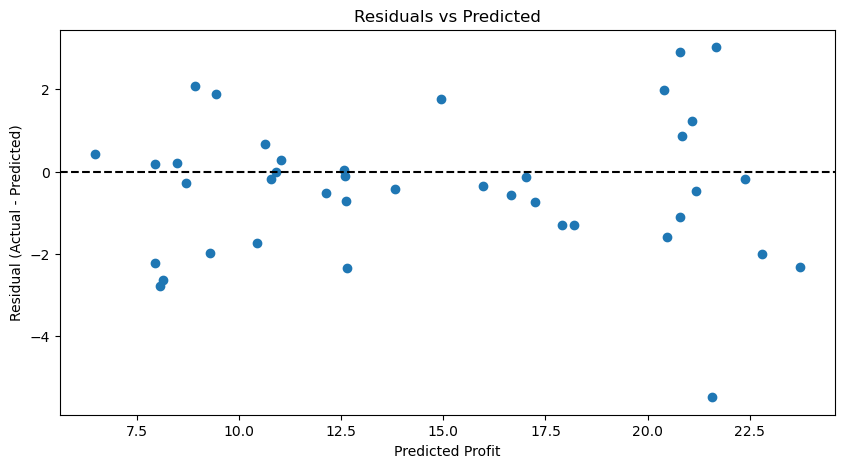

In [25]:
#Visualize: Actual sales vs predicted sales (change 'Profit' to 'Sales' if needed)
#scatter plot
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Sales', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Sales', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()